In [5]:
import pandas as pd
from pydataset import data

import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

df = data('faithful')

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [6]:
df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [10]:
df.shape

(272, 2)

In [7]:
stats.pearsonr(df.eruptions, df.waiting)

(0.9008111683218131, 8.129958506616628e-100)

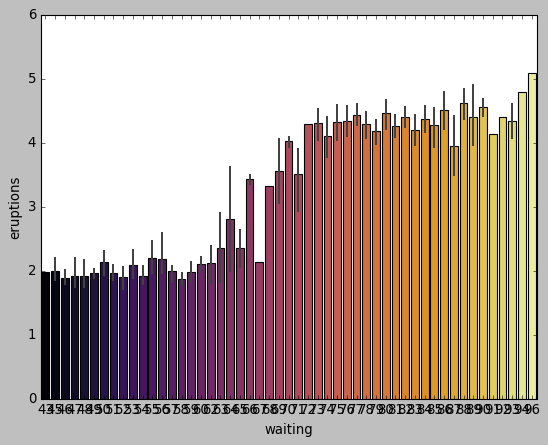

In [12]:
sns.barplot(x='waiting', y='eruptions', data=df, palette='inferno')

### Linear Regression Model

In [67]:
lm = LinearRegression()

In [15]:
X = df.drop(['eruptions'], axis=1)
y = df[['eruptions']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, test_size=.3, random_state=123)

In [18]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


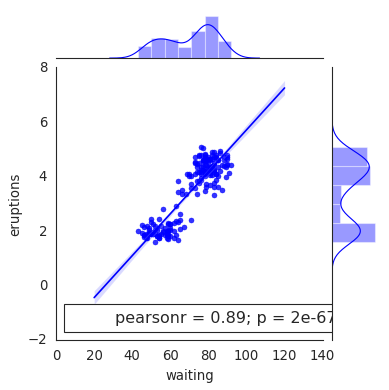

In [19]:
with sns.axes_style('white'):
    j = sns.jointplot("waiting", "eruptions", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

In [30]:
lm.fit(X_train[['waiting']], y_train)
print(lm)

lm_y_intercept = lm.intercept_
print(lm_y_intercept)

lm_coefficients = lm.coef_
print(lm_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-1.99916136]
[[0.07705685]]


In [40]:
print('Univariate - eruptions = b + m * waiting')
print('    y-intercept (b): %.2f' % lm_y_intercept)
print('    coefficient (m): %.2f' % lm_coefficients[0])
print()

Univariate - eruptions = b + m * waiting
    y-intercept (b): -2.00
    coefficient (m): 0.08



In [37]:
y_pred_lm = lm.predict(X_train[['waiting']])

In [41]:
mse_lm = mean_squared_error(y_train, y_pred_lm)
print("lm\n  mse: {:.4}".format(mse_lm)) 

lm
  mse: 0.2659


In [43]:
r2_lm = r2_score(y_train, y_pred_lm)

print('  {:.2%} of the variance in eruptions can be explained by waiting.'.format(r2_lm))

  79.91% of the variance in eruptions can be explained by waiting.


Text(44.40856875, 0.5, 'Eruptions')

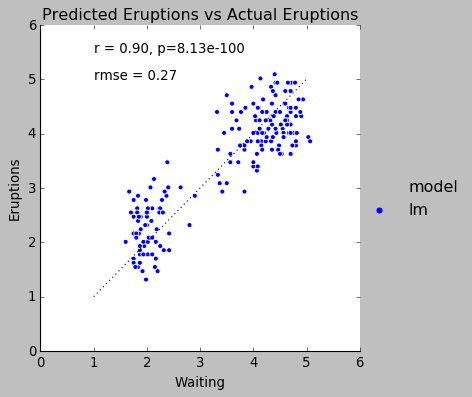

In [70]:
pd.DataFrame({'actual': y_train.eruptions,
              'lm': y_pred_lm.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([1, 5], [1, 5],c='black', ls=':')
plt.annotate('r = {:.2f}, p={:.3}'.format(*stats.pearsonr(df.eruptions, df.waiting)), (1, 5.5))
plt.annotate('rmse = {:.2f}'.format(mean_squared_error(y_train, y_pred_lm)), (1, 5))

plt.title('Predicted Eruptions vs Actual Eruptions')
plt.xlabel('Waiting')
plt.ylabel('Eruptions')